## Observations and Insights 

## Cleaning the Data
Mouse ID, g989, was eliminated from analysis, because two different tumor volume results were recorded for the same mouse at the same timepoint in the dataset.

## About the Study
* A total of 248 unique mice were tested in the study.
* Ten different drug regimens were trialed for the study.
* There was about half female and half male mice in the study.

## Results
* Mice that were tested with the Capomulin and Ramicane drug regimens had smaller average tumor volumes in comparison to the other drug regimens. There was also a smaller variance, standard deviation, and SEM in these tumor volumes, indicating a smaller dispersion of data in comparison to the other drug regimens.

* There were more timepoints for mice tested with Capomulin and Ramicane than Propiva.

* The median final tumor volume of each mouse tested with Capomulin and Ramicane was smaller than mice tested with Ifanbinol or Ceftamin, indicating that Capomulin and Ramicane are likely more promising treatment regimens. The lower bound for Capomulin and Ramicane regimen tumors are smaller than Ifanbinol or Ceftamin regimen tumors. 
* There was only one outlier in the dataset, for the drug Ifanbinol. Otherwise, the results were fairly consistent fro the four drug regimens.

* Looking more specifically at mouse s185 treated with Capomulin as an example, the tumor size decreased from ~45mm3 to less than 25 mm3 in about 45 days. A strong downward slope can be seen along the timepoints, even though the tumor size plateaus slightly on the 10th day.

* Tumor size is positively correlated with mouse weight for the mice treated with Capomulin, with a strong r-value correlation. The mice size would need to be factored into the analysis to understand the true effectiveness of the drug.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset. Merge the two DataFrames together based on the mouse ID. 
mouse_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
mouse_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
unique_mice =mouse_df['Mouse ID'].nunique()
print(f" There are {unique_mice} unique mice before cleaning the data.")

 There are 249 unique mice before cleaning the data.


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_df.groupby(['Timepoint','Mouse ID',])

#using the size() function creates an unmarked 0 column to filter for my duplicate rows
mice_filter = duplicate_mice.size().reset_index()

duplicates=mice_filter[mice_filter[0]>1]
duplicates.head()

#use code below to check how many duplicates we had (5 in this case)
#len(size[size[0]>1])

,Timepoint,Mouse ID,0
72,0,g989,2
318,5,g989,2
552,10,g989,2
772,15,g989,2
975,20,g989,2


In [5]:
# Optional: Get all the data for the duplicate mouse ID, "g989" 
data_dup = mouse_df.loc[mouse_df['Mouse ID'] == "g989", :]
data_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mice = mouse_df.loc[mouse_df['Mouse ID'] != "g989", :]
cleaned_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
#number of cleaned mice
new_unique_mice =cleaned_mice['Mouse ID'].nunique()
print(f" There are {new_unique_mice} unique mice after cleaning the data.")

 There are 248 unique mice after cleaning the data.


## Summary Statistics

In [8]:
# Assemble the resulting series into a single summary dataframe.
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_mice = cleaned_mice.groupby("Drug Regimen")
mean_tumor = summary_mice['Tumor Volume (mm3)'].mean()
median_tumor =summary_mice['Tumor Volume (mm3)'].median()
var_tumor = summary_mice['Tumor Volume (mm3)'].var()
std_tumor = summary_mice['Tumor Volume (mm3)'].std()
sem_tumor = summary_mice['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({
                                "mean": mean_tumor, 
                                "median": median_tumor, 
                                "var": var_tumor, 
                                "std": std_tumor, 
                                "sem": sem_tumor
                                })
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats2 = cleaned_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

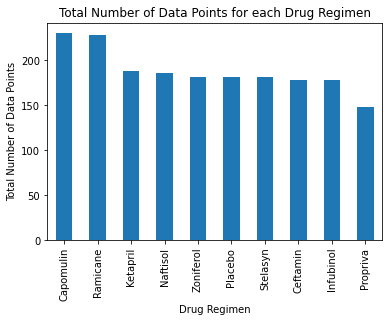

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = cleaned_mice.groupby(['Drug Regimen'])['Timepoint'].count()
bar_plot = timepoints.sort_values(ascending=False).plot(kind='bar')

# Set the xlabel, ylabel, and title
bar_plot.set_ylabel("Total Number of Data Points")
bar_plot.set_title("Total Number of Data Points for each Drug Regimen")
plt.show()

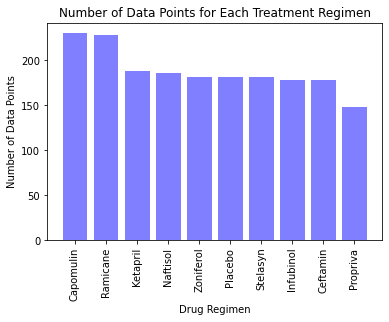

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#number of timepoints for each drug regimen
num_timepoints = cleaned_mice['Drug Regimen'].value_counts()

#sets x_axis to the length of the 
x_axis = np.arange(len(num_timepoints))

plt.bar(x_axis, num_timepoints, color ="b", alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, num_timepoints.index.values)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title('Number of Data Points for Each Treatment Regimen')

# Rotate tick marks 90 degrees
plt.xticks(rotation=90)

#Display plot
plt.show()
num_timepoints

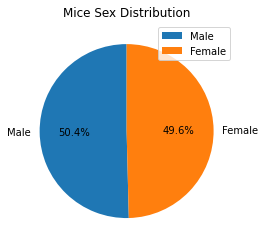

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#only want one mouse per sex

unique_df = cleaned_mice.drop_duplicates(subset = ["Mouse ID"])
gender_df=pd.DataFrame(unique_df['Sex'].value_counts())
gender_df

pie_plot = gender_df.plot(kind='pie', y='Sex',title=("Mice Sex Distribution"),autopct="%1.1f%%",startangle=90)
plt.ylabel('')
plt.show()

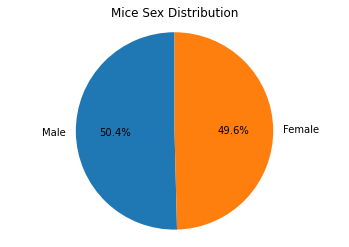

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#only want one mouse per sex
labels=gender_df.index.values
labels = labels.tolist()
pie = gender_df['Sex']

plt.pie(pie, labels=gender_df.index.values,autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.title("Mice Sex Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = cleaned_mice.groupby(['Mouse ID'])['Timepoint'].max()
final_timepoint_df = pd.DataFrame(final_timepoint)
final_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#Merges mice data with the final timepoint data for each mouse
final_df = pd.merge(cleaned_mice, final_timepoint_df, on=("Mouse ID","Timepoint"), how='right')
final_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [23]:
#Create an empty list that holds the treatment names
#Create an empty list that holds tumor volume data

#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin. 
#Then, calculate the quartiles and IQR and determine if there are any potential outliers across all four treatment regimens. 
#Follow these substeps:
tumor_vol = []

#treatment_list = final_df['Drug Regimen'].unique()
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# #Loop through each drug in the treatment list, 
# #locating the rows in the merged DataFrame that correspond to each treatment. 

for each in treatment_list:
    #use loc to find the rows the correspond to each
    final_tumor_vol = final_df.loc[final_df['Drug Regimen'] == each]['Tumor Volume (mm3)']
    tumor_vol.append(final_tumor_vol)

#Determine outliers by using the upper and lower bounds, and then print the results.
#Calculate the IQR and quantitatively determine if there are any potential outliers.
counter = 0
for each in tumor_vol:
    quartiles = tumor_vol[counter].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq - lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    print(f" {treatment_list[counter]} lower quartiles is {lowerq}.")
    print(f" {treatment_list[counter]} upper quartiles is {upperq}.")
    print(f" {treatment_list[counter]} IQR is {iqr}.")
    print(f" {treatment_list[counter]} potential outliers could be values below {lower_bound} and above {upper_bound}.")
    print("")
    counter = counter+1
# Determine outliers using upper and lower bounds

 Capomulin lower quartiles is 32.38.
 Capomulin upper quartiles is 40.16.
 Capomulin IQR is 7.78.
 Capomulin potential outliers could be values below 20.71 and above 51.83.

 Ramicane lower quartiles is 31.56.
 Ramicane upper quartiles is 40.66.
 Ramicane IQR is 9.1.
 Ramicane potential outliers could be values below 17.91 and above 54.31.

 Infubinol lower quartiles is 54.05.
 Infubinol upper quartiles is 65.53.
 Infubinol IQR is 11.48.
 Infubinol potential outliers could be values below 36.83 and above 82.75.

 Ceftamin lower quartiles is 48.72.
 Ceftamin upper quartiles is 64.3.
 Ceftamin IQR is 15.58.
 Ceftamin potential outliers could be values below 25.35 and above 87.67.



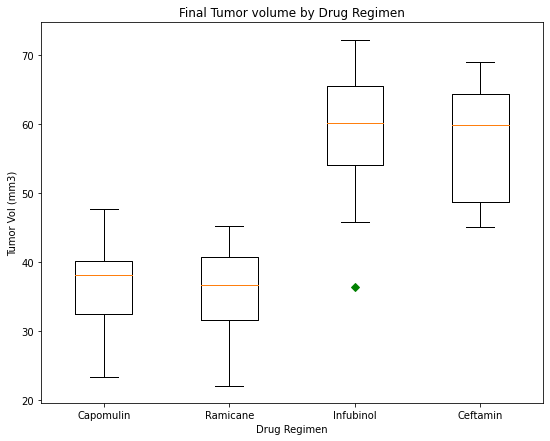

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(tumor_vol,notch=0,sym='gD')
plt.xticks([1,2,3,4],treatment_list)

# Save the figure

plt.show()

## Line and Scatter Plots

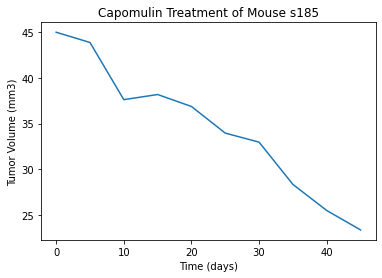

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# 1. Select a mouse that was treated with Capomulin 
#and generate a line plot of tumor volume vs. time point for that mouse.

x = cleaned_mice.loc[cleaned_mice['Mouse ID']=='s185']['Timepoint']
y = cleaned_mice.loc[cleaned_mice['Mouse ID'] == 's185']['Tumor Volume (mm3)']
      
#Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Identify data points of a mouse treated with Capomulin
#Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
#marker = 'o' adds circles on each data point for visibility

plt.plot(x,y)
#Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

#Display plot
plt.show()

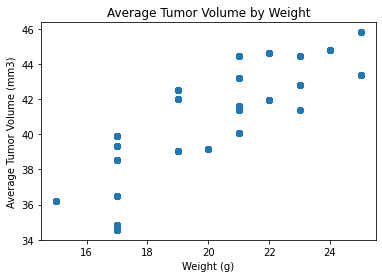

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Create a dataframe for only the Capomulin data
capomulin_data = cleaned_mice.loc[cleaned_mice['Drug Regimen'] == 'Capomulin']

final_timepoint_cap = capomulin_data.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
# Merge average tumor volume onto data_df and drop duplicates})
final_cap_df = pd.DataFrame(final_timepoint_cap).rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
final_cap_df

avg_tumor_vol = pd.merge(capomulin_data, final_cap_df, on= "Mouse ID")

#Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen

x_scatter = avg_tumor_vol['Weight (g)']
y_scatter = avg_tumor_vol['avg_tumor_vol']

plt.scatter(x_scatter, y_scatter)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

## Correlation and Regression

The correlation coefficient is 0.83.


Text(20, 35, 'r_value = 0.83')

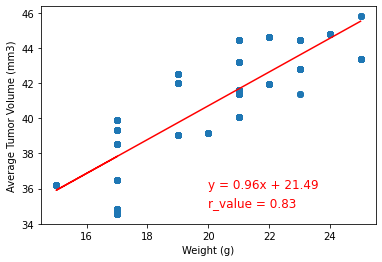

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation_coeff = st.pearsonr(x_scatter,y_scatter)
print(f"The correlation coefficient is {round(correlation_coeff[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_scatter, y_scatter)
regress_values = x_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rval = "r_value = " + str(round(rvalue,2))

plt.scatter(x_scatter,y_scatter)
plt.plot(x_scatter,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.annotate(line_eq,(20,36),fontsize=12,color="red")
plt.annotate(rval, (20,35), fontsize=12, color="red")